In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [ ]:
df_native = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/RNAz_Excel/native.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/RNAz_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/RNAz_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/RNAz_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/RNAz_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/RNAz_Excel/alifoldz.xlsx"))

In [ ]:
# df_native = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/sissi.xlsx"))
# df_sissiz_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/sissiz_mono.xlsx"))
# df_sissiz_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/sissiz_di.xlsx"))
# df_multiperm_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/multiperm_mono.xlsx"))
# df_multiperm_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/multiperm_di.xlsx"))
# df_aln_shuffle = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/alifoldz.xlsx"))

In [ ]:
new_df_native = df_native.drop(['Sequences', 'Columns'], axis=1)
new_df_native.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,66.85,0.72089,0.44873,-117.04,-58.41,-56.18,-2.24,1.48,-42.37,0.50,3.83,0.999373,RepA_Fang_Fig5.txt
1,77.95,0.53700,0.52096,-8.13,-6.35,-6.19,-0.15,2.00,-0.73,0.78,1.03,0.876692,RF02162.txt
2,68.61,0.58826,0.44864,-118.52,-65.04,-65.07,0.03,1.38,-43.82,0.55,3.52,0.998847,XIST_A.S0.txt
3,68.61,0.58826,0.44864,-118.52,-65.04,-65.07,0.03,1.38,-43.82,0.55,3.52,0.998847,XIST_A.S1.txt
4,68.61,0.58826,0.44864,-118.52,-65.04,-65.07,0.03,1.38,-43.82,0.55,3.52,0.998847,XIST_A.S2.txt
5,68.61,0.58826,0.44864,-118.52,-65.04,-65.07,0.03,1.38,-43.82,0.55,3.52,0.998847,XIST_A.S3.txt
6,76.50,0.40147,0.43946,-5.43,-4.14,-4.26,0.12,1.33,-0.52,0.76,-0.59,0.237566,XIST_A.txt


In [ ]:
new_df_native[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,70.820000,0.573200,0.457673,-86.382857,-47.008571,-46.701429,-0.307143,1.475714,-31.271429,0.605714,2.621429,0.872717
std,4.442158,0.094447,0.028117,54.387374,28.639588,28.524585,0.856129,0.235504,20.942278,0.113850,1.709595,0.283757
min,66.850000,0.401470,0.439460,-118.520000,-65.040000,-65.070000,-2.240000,1.330000,-43.820000,0.500000,-0.590000,0.237566
25%,68.610000,0.562630,0.448640,-118.520000,-65.040000,-65.070000,-0.060000,1.380000,-43.820000,0.550000,2.275000,0.937770
50%,68.610000,0.588260,0.448640,-118.520000,-65.040000,-65.070000,0.030000,1.380000,-43.820000,0.550000,3.520000,0.998847
75%,72.555000,0.588260,0.448685,-62.585000,-32.380000,-31.185000,0.030000,1.430000,-21.550000,0.655000,3.520000,0.998847
max,77.950000,0.720890,0.520960,-5.430000,-4.140000,-4.260000,0.120000,2.000000,-0.520000,0.780000,3.830000,0.999373


In [9]:
new_df_sissiz_mono = df_sissiz_mono.drop(['Sequences', 'Columns'], axis=1)
new_df_sissiz_mono.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,66.24,0.75663,0.40910,-98.64,-17.84,-18.29,0.45,1.29,-34.01,0.18,4.12,0.999639,neg_sample_SISSIz_mono_RepA_Fang_Fig5.txt
1,76.96,0.56809,0.60136,-5.91,0.00,0.00,0.00,0.00,0.98,-0.00,-9.26,0.000000,neg_sample_SISSIz_mono_RF02162.txt
2,67.51,0.61716,0.45862,-99.26,-25.32,-25.74,0.42,1.16,-24.64,0.26,3.98,0.999529,neg_sample_SISSIz_mono_XIST_A.S0.txt
3,68.07,0.60862,0.47564,-115.04,-30.31,-32.25,1.94,1.27,-25.43,0.26,3.96,0.999513,neg_sample_SISSIz_mono_XIST_A.S1.txt
4,67.70,0.60937,0.47365,-112.78,-28.02,-29.20,1.18,1.10,-25.17,0.25,3.94,0.999495,neg_sample_SISSIz_mono_XIST_A.S2.txt
5,67.70,0.60937,0.47365,-112.78,-28.02,-29.20,1.18,1.10,-25.17,0.25,3.94,0.999495,neg_sample_SISSIz_mono_XIST_A.S3.txt
6,77.14,0.39463,0.46275,-4.03,-1.50,-1.50,-0.00,1.00,0.35,0.37,-6.02,0.000009,neg_sample_SISSIz_mono_XIST_A.txt


In [10]:
new_df_sissiz_mono[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,70.188571,0.594839,0.479253,-78.348571,-18.715714,-19.454286,0.738571,0.988571,-19.012857,0.224286,0.665714,0.713954
std,4.722550,0.106525,0.058602,50.558438,12.900964,13.511597,0.719825,0.447528,13.833619,0.113557,5.750788,0.487721
min,66.240000,0.394630,0.409100,-115.040000,-30.310000,-32.250000,-0.000000,0.000000,-34.010000,-0.000000,-9.260000,0.000000
25%,67.605000,0.588355,0.460685,-112.780000,-28.020000,-29.200000,0.210000,1.050000,-25.300000,0.215000,-1.040000,0.499752
50%,67.700000,0.609370,0.473650,-99.260000,-25.320000,-25.740000,0.450000,1.100000,-25.170000,0.250000,3.940000,0.999495
75%,72.515000,0.613265,0.474645,-52.275000,-9.670000,-9.895000,1.180000,1.215000,-12.145000,0.260000,3.970000,0.999521
max,77.140000,0.756630,0.601360,-4.030000,0.000000,0.000000,1.940000,1.290000,0.980000,0.370000,4.120000,0.999639


In [11]:
new_df_sissiz_di = df_sissiz_di.drop(['Sequences', 'Columns'], axis=1)
new_df_sissiz_di.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,66.16,0.75135,0.45008,-116.60,-33.74,-34.30,0.55,1.15,-40.80,0.29,4.29,0.999741,neg_sample_SISSIz_di_RepA_Fang_Fig5.txt
1,76.58,0.56843,0.46466,-6.64,0.00,0.00,0.00,0.00,-0.84,-0.00,-6.29,0.000005,neg_sample_SISSIz_di_RF02162.txt
2,67.01,0.61963,0.46240,-123.95,-44.52,-46.27,1.75,1.06,-37.42,0.36,4.06,0.999593,neg_sample_SISSIz_di_XIST_A.S0.txt
3,67.01,0.61963,0.46240,-123.95,-44.52,-46.27,1.75,1.06,-37.42,0.36,4.06,0.999593,neg_sample_SISSIz_di_XIST_A.S1.txt
4,67.86,0.60580,0.50633,-123.77,-39.43,-41.62,2.19,1.15,-22.18,0.32,4.03,0.999574,neg_sample_SISSIz_di_XIST_A.S2.txt
5,66.49,0.63515,0.47457,-134.36,-31.76,-32.60,0.84,1.16,-34.69,0.24,3.98,0.999526,neg_sample_SISSIz_di_XIST_A.S3.txt
6,73.47,0.43882,0.36818,-2.02,-0.44,-0.44,0.00,1.00,2.80,0.22,-9.42,0.000000,neg_sample_SISSIz_di_XIST_A.txt


In [12]:
new_df_sissiz_di[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,69.225714,0.605544,0.455517,-90.184286,-27.772857,-28.785714,1.011429,0.940000,-24.364286,0.255714,0.672857,0.714005
std,4.096059,0.092832,0.042388,58.892727,19.436835,20.220338,0.891467,0.418848,18.319925,0.125148,5.896100,0.487756
min,66.160000,0.438820,0.368180,-134.360000,-44.520000,-46.270000,0.000000,0.000000,-40.800000,-0.000000,-9.420000,0.000000
25%,66.750000,0.587115,0.456240,-123.950000,-41.975000,-43.945000,0.275000,1.030000,-37.420000,0.230000,-1.155000,0.499766
50%,67.010000,0.619630,0.462400,-123.770000,-33.740000,-34.300000,0.840000,1.060000,-34.690000,0.290000,4.030000,0.999574
75%,70.665000,0.627390,0.469615,-61.620000,-16.100000,-16.520000,1.750000,1.150000,-11.510000,0.340000,4.060000,0.999593
max,76.580000,0.751350,0.506330,-2.020000,0.000000,0.000000,2.190000,1.160000,2.800000,0.360000,4.290000,0.999741


In [13]:
new_df_multiperm_mono = df_multiperm_mono.drop(['Sequences', 'Columns'], axis=1)
new_df_multiperm_mono.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,50.29,1.15589,0.64322,-174.52,-11.02,-11.51,0.49,1.14,-29.55,0.06,4.70,0.999883,neg_sample_MULTIPERM_mono_RepA_Fang_Fig5.txt
1,62.36,0.93075,0.69101,-9.71,0.00,0.00,0.00,0.00,-0.37,-0.00,-5.09,0.000053,neg_sample_MULTIPERM_mono_RF02162.txt
2,68.61,0.59463,0.44864,-115.24,-32.35,-33.28,0.93,1.41,-41.60,0.28,3.97,0.999520,neg_sample_MULTIPERM_mono_XIST_A.S0.txt
3,68.61,0.59463,0.44864,-113.66,-26.68,-26.98,0.30,1.28,-40.42,0.23,3.87,0.999414,neg_sample_MULTIPERM_mono_XIST_A.S1.txt
4,68.61,0.59463,0.44864,-115.14,-27.14,-27.34,0.20,1.45,-41.42,0.24,3.89,0.999441,neg_sample_MULTIPERM_mono_XIST_A.S2.txt
5,68.61,0.59463,0.44864,-111.63,-22.98,-23.59,0.61,1.37,-39.15,0.21,3.81,0.999347,neg_sample_MULTIPERM_mono_XIST_A.S3.txt
6,76.50,0.44162,0.43946,-2.88,0.00,0.00,0.00,0.00,1.25,-0.00,-10.06,0.000000,neg_sample_MULTIPERM_mono_XIST_A.txt


In [14]:
new_df_multiperm_mono[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000
mean,66.227143,0.700969,0.509750,-91.825714,-17.167143,-17.528571,0.361429,0.95000,-27.322857,0.145714,0.727143,0.713951
std,8.136245,0.249080,0.108434,62.521204,13.425534,13.669716,0.339776,0.65676,19.415662,0.121086,5.857851,0.487703
min,50.290000,0.441620,0.439460,-174.520000,-32.350000,-33.280000,0.000000,0.00000,-41.600000,-0.000000,-10.060000,0.000000
25%,65.485000,0.594630,0.448640,-115.190000,-26.910000,-27.160000,0.100000,0.57000,-40.920000,0.030000,-0.640000,0.499700
50%,68.610000,0.594630,0.448640,-113.660000,-22.980000,-23.590000,0.300000,1.28000,-39.150000,0.210000,3.870000,0.999414
75%,68.610000,0.762690,0.545930,-60.670000,-5.510000,-5.755000,0.550000,1.39000,-14.960000,0.235000,3.930000,0.999480
max,76.500000,1.155890,0.691010,-2.880000,0.000000,0.000000,0.930000,1.45000,1.250000,0.280000,4.700000,0.999883


In [15]:
new_df_multiperm_di = df_multiperm_di.drop(['Sequences', 'Columns'], axis=1)
new_df_multiperm_di.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,50.47,1.14869,0.64574,-174.57,-31.91,-33.00,1.09,1.15,-29.76,0.18,4.90,0.999920,neg_sample_MULTIPERM_di_RepA_Fang_Fig5.txt
1,62.65,0.92165,0.68016,-9.49,0.00,0.00,0.00,0.00,-0.21,-0.00,-5.49,0.000025,neg_sample_MULTIPERM_di_RF02162.txt
2,68.61,0.59463,0.44864,-114.92,-51.71,-50.95,-0.76,1.37,-41.28,0.45,3.89,0.999439,neg_sample_MULTIPERM_di_XIST_A.S0.txt
3,68.61,0.59463,0.44864,-116.36,-65.09,-66.38,1.29,1.36,-42.29,0.56,3.47,0.998737,neg_sample_MULTIPERM_di_XIST_A.S1.txt
4,68.61,0.59463,0.44864,-112.85,-56.11,-54.80,-1.31,1.42,-39.88,0.50,3.73,0.999241,neg_sample_MULTIPERM_di_XIST_A.S2.txt
5,68.61,0.59463,0.44864,-115.52,-55.76,-56.65,0.89,1.33,-41.92,0.48,3.80,0.999336,neg_sample_MULTIPERM_di_XIST_A.S3.txt
6,76.50,0.44162,0.43946,-7.44,-7.29,-7.69,0.40,1.00,-1.99,0.98,2.54,0.992541,neg_sample_MULTIPERM_di_XIST_A.txt


In [16]:
new_df_multiperm_di[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,66.294286,0.698640,0.508560,-93.021429,-38.267143,-38.495714,0.228571,1.090000,-28.190000,0.450000,2.405714,0.855606
std,8.054973,0.245496,0.105988,61.746045,25.784086,25.784897,0.977436,0.502925,19.004878,0.308707,3.550009,0.377284
min,50.470000,0.441620,0.439460,-174.570000,-65.090000,-66.380000,-1.310000,0.000000,-42.290000,-0.000000,-5.490000,0.000025
25%,65.630000,0.594630,0.448640,-115.940000,-55.935000,-55.725000,-0.380000,1.075000,-41.600000,0.315000,3.005000,0.995639
50%,68.610000,0.594630,0.448640,-114.920000,-51.710000,-50.950000,0.400000,1.330000,-39.880000,0.480000,3.730000,0.999241
75%,68.610000,0.758140,0.547190,-61.170000,-19.600000,-20.345000,0.990000,1.365000,-15.875000,0.530000,3.845000,0.999387
max,76.500000,1.148690,0.680160,-7.440000,0.000000,0.000000,1.290000,1.420000,-0.210000,0.980000,4.900000,0.999920


In [17]:
new_df_aln_shuffle = df_aln_shuffle.drop(['Sequences', 'Columns', 'File'], axis=1)
new_df_aln_shuffle.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
0,66.85,0.72089,0.44873,-99.64,-37.07,-37.90,0.83,1.38,-31.32,0.37,4.20,0.999694
1,77.95,0.53700,0.52096,-7.95,-3.73,-3.83,0.10,1.33,-0.66,0.47,-1.18,0.091688
2,68.61,0.58826,0.44864,-96.92,-35.59,-35.91,0.32,1.32,-28.78,0.37,4.00,0.999551
3,68.61,0.58826,0.44864,-101.97,-49.35,-49.69,0.34,1.32,-32.54,0.48,3.80,0.999330
4,68.61,0.58826,0.44864,-98.26,-41.31,-41.51,0.20,1.29,-29.92,0.42,3.95,0.999498
5,68.61,0.58826,0.44864,-101.64,-36.90,-36.56,-0.34,1.38,-32.28,0.36,4.01,0.999555


In [18]:
new_df_aln_shuffle[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,69.873333,0.601822,0.460708,-84.396667,-33.991667,-34.233333,0.241667,1.336667,-25.916667,0.411667,3.130000,0.848219
std,4.018884,0.061830,0.029517,37.501020,15.656910,15.734612,0.380022,0.036148,12.455369,0.053448,2.115353,0.370623
min,66.850000,0.537000,0.448640,-101.970000,-49.350000,-49.690000,-0.340000,1.290000,-32.540000,0.360000,-1.180000,0.091688
25%,68.610000,0.588260,0.448640,-101.140000,-40.250000,-40.607500,0.125000,1.320000,-32.040000,0.370000,3.837500,0.999372
50%,68.610000,0.588260,0.448640,-98.950000,-36.985000,-37.230000,0.260000,1.325000,-30.620000,0.395000,3.975000,0.999524
75%,68.610000,0.588260,0.448708,-97.255000,-35.917500,-36.072500,0.335000,1.367500,-29.065000,0.457500,4.007500,0.999554
max,77.950000,0.720890,0.520960,-7.950000,-3.730000,-3.830000,0.830000,1.380000,-0.660000,0.480000,4.200000,0.999694


## SVM RNA-class probability

C:\Users\Stefan\AppData\Local\Temp\ipykernel_4880\677426179.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
C:\Users\Stefan\AppData\Local\Temp\ipykernel_4880\677426179.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_4880\677426179.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_4880\677426179.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alph

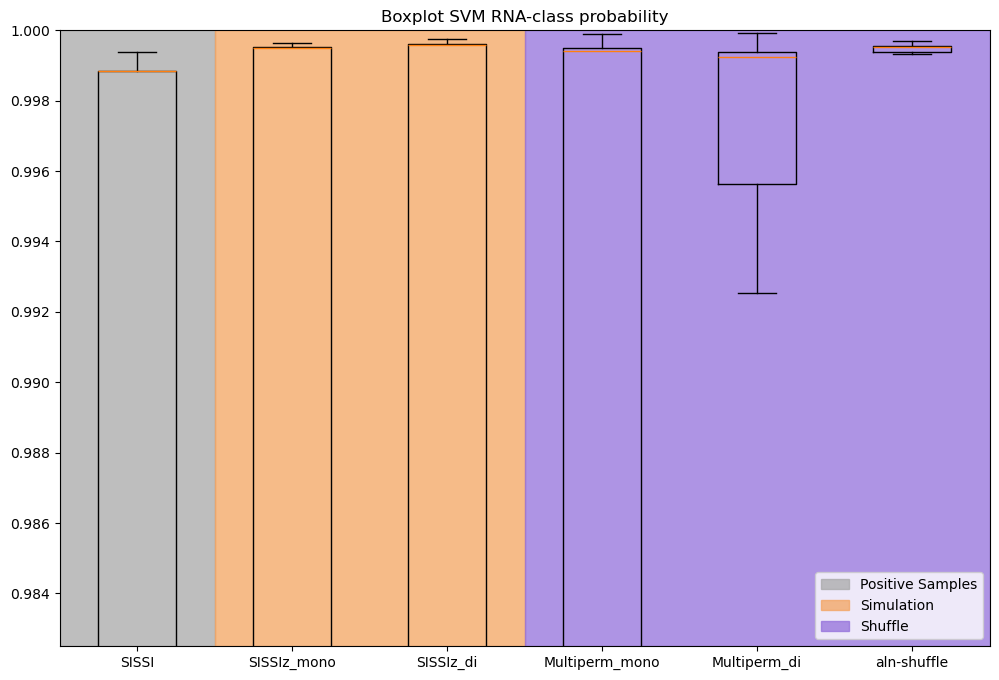

In [ ]:
dataframes = [new_df_native, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['SVM RNA-class probability'] for df in dataframes]
thresholds = [0.9]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

plt.ylim(0.9825, 1.0)
plt.title('Boxplot SVM RNA-class probability')
plt.legend()
plt.show()

## Structure conservation index (SCI)

C:\Users\Stefan\AppData\Local\Temp\ipykernel_4880\1882094440.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


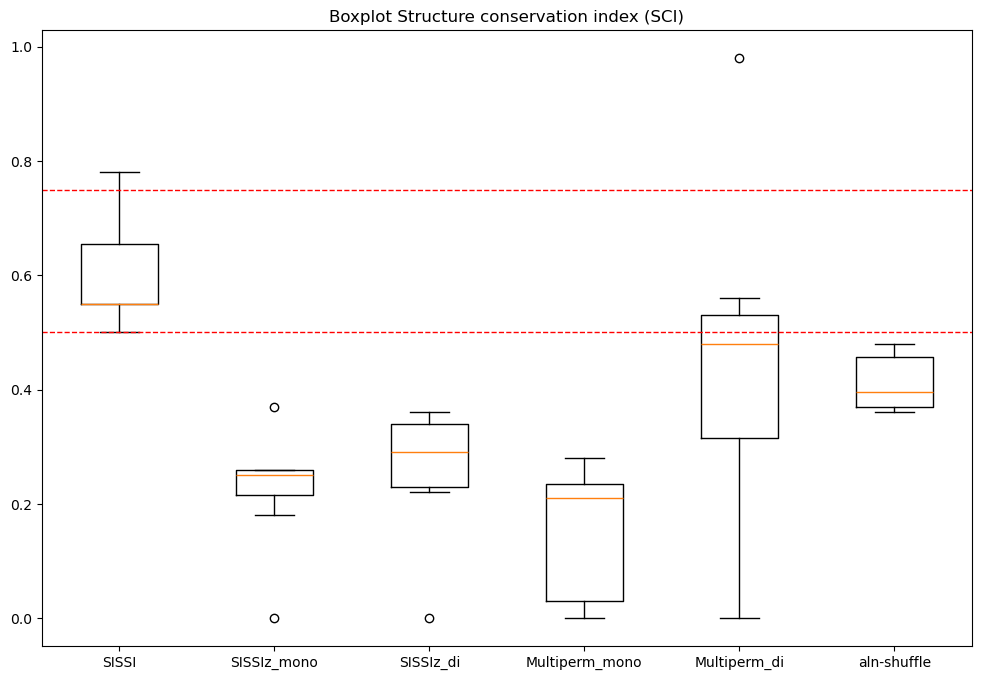

In [ ]:
dataframes = [new_df_native, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Structure conservation index'] for df in dataframes]
thresholds = [0.5, 0.75]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Structure conservation index (SCI)')
plt.show()


## Mean z-score

C:\Users\Stefan\AppData\Local\Temp\ipykernel_4880\1086545868.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


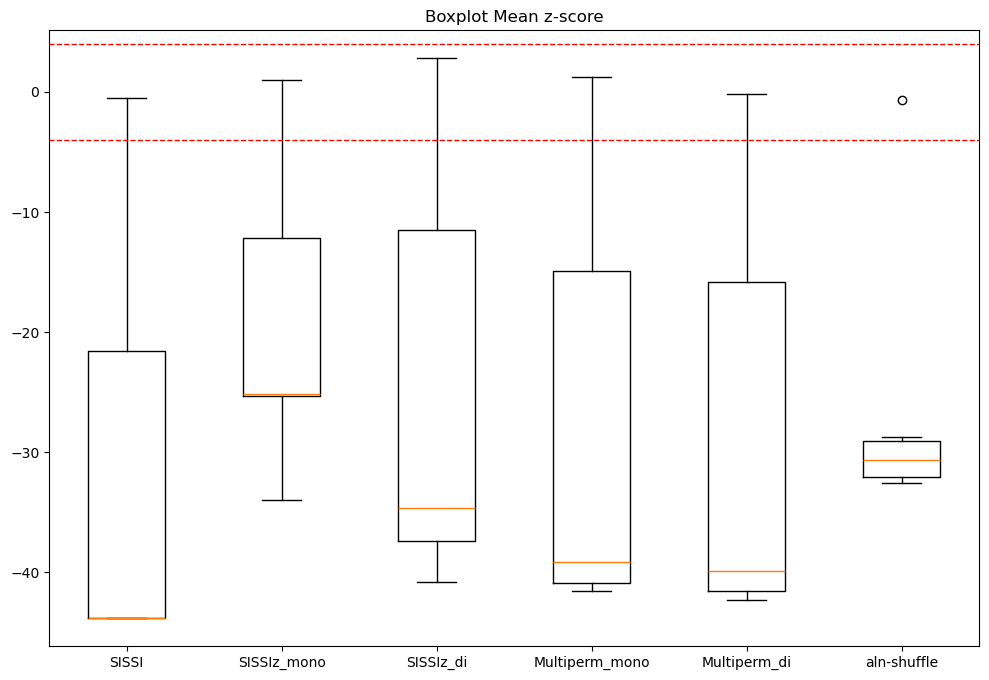

In [ ]:
dataframes = [new_df_native, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Mean z-score'] for df in dataframes]
thresholds = [-4, 4]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Mean z-score')
plt.show()

## Consensus MFE

C:\Users\Stefan\AppData\Local\Temp\ipykernel_4880\2230145245.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


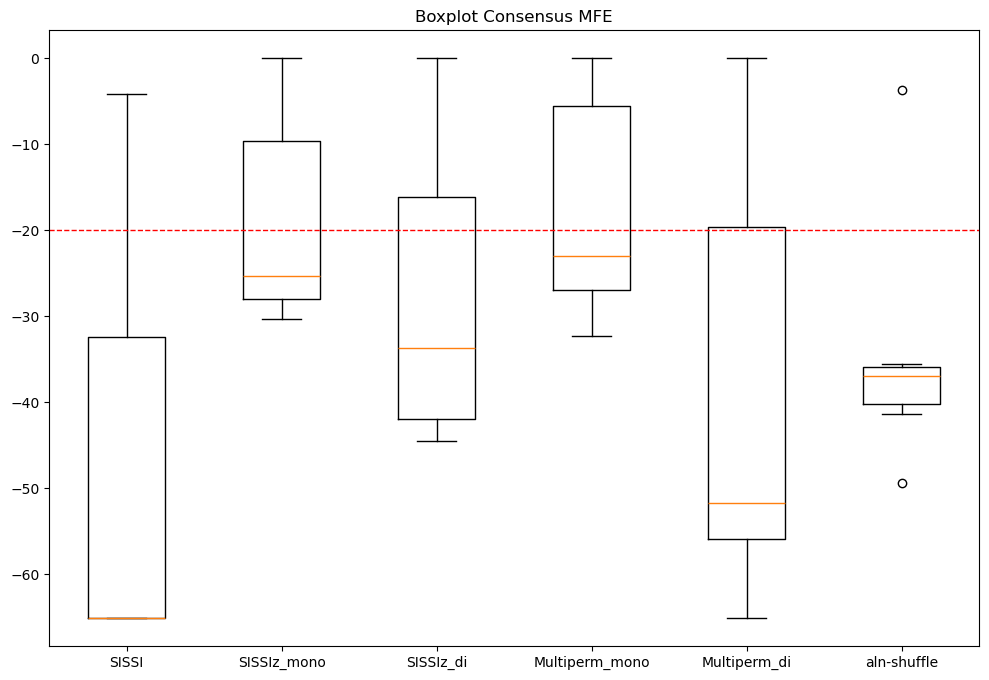

In [ ]:
dataframes = [new_df_native, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Consensus MFE'] for df in dataframes]
thresholds = [-20]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Consensus MFE')
plt.show()

## Mean pairwise identity

C:\Users\Stefan\AppData\Local\Temp\ipykernel_4880\1678256478.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


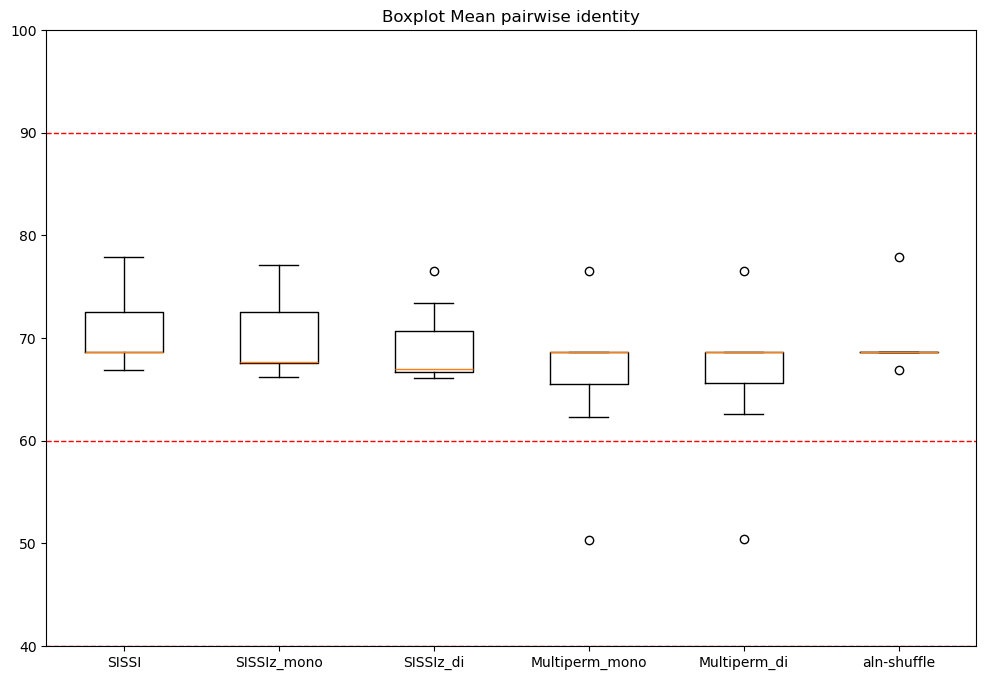

In [ ]:
dataframes = [new_df_native, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Mean pairwise identity'] for df in dataframes]
thresholds = [40, 60, 90]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.ylim(40, 100)
plt.title('Boxplot Mean pairwise identity')
plt.show()

## Confusion Matrix and Roc-Curve

In [24]:
# def confusionMatrixAndRocCurve(data):
#     threshold = -3
#     data_X = data.drop(columns=["z-score calculated from 7. 8. and 9.", "File"])
#     data_y = (data['z-score calculated from 7. 8. and 9.'] > threshold).astype(int)

#     X_train, X_test, y_train, y_test = train_test_split(data_X, data_y , test_size=0.3, random_state=42)

#     model = LogisticRegression() 
#     model.fit(X_train, y_train) 
#     y_pred_proba = model.predict_proba(X_test)[:, 1] 
#     y_pred = (y_pred_proba >= 0.5).astype(int)

#     accuracy = accuracy_score(y_test, y_pred)
#     class_report = classification_report(y_test, y_pred)

#     print(accuracy)
#     print(class_report)
    
#     conf_matrix = metrics.confusion_matrix(y_test, y_pred)
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])

#     cm_display.plot()
#     plt.show() 

#     fpr, tpr, thresholds = roc_curve(y_test, y_pred) 

#     print(fpr)
#     print(tpr)
#     roc_auc = auc(fpr, tpr)

#     # Plot the ROC curve
#     plt.figure()  
#     plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve for ...')
#     plt.legend()
#     plt.show()